# Anatomy of a cranked wing — The equivalent wing (1)

— Agostino De Marco, <font color='darkblue'><i>University of Naples Federico II, Dept. Industrial Engineering</i></font>

##### Interlude — setup our Python tools first

In [22]:
%run ./src/cranked_wing/init.py
%matplotlib inline
%run ./src/wing_functions.py

## Nomenclature recap

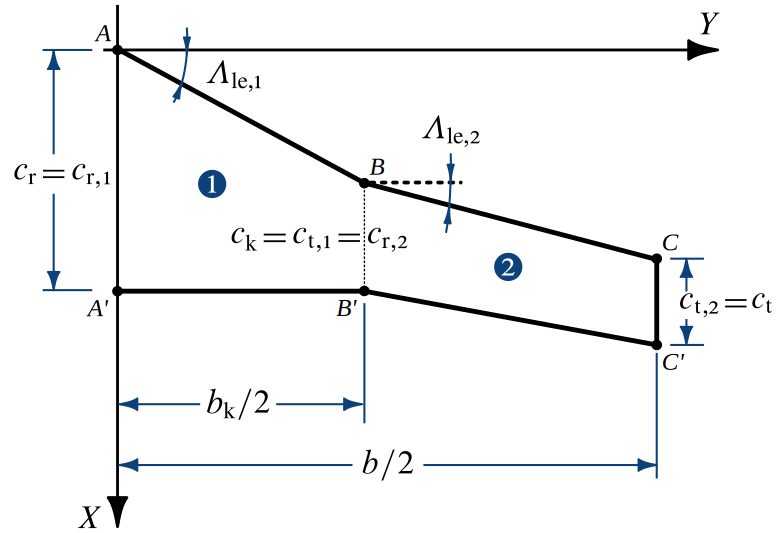

In [23]:
SVG(filename='./resources/cranked_wing_WEB.svg')

Retrieve data produced by notebook: `cranked_wing.pynb`

In [24]:
store = retrieve_stored_data('cranked_wing_store') # store not closed yet
data_summary(store)

<IPython.core.display.Latex object>

Get data from the dictionary `store` and assign all variables.

In [25]:
c_r = store['c_r']
c_k = store['c_k']
c_t = store['c_t']
eps_k = store['eps_k']
eps_t = store['eps_t']
alpha0l_r = store['alpha0l_r']
alpha0l_k = store['alpha0l_k']
alpha0l_t = store['alpha0l_t']
b_k = store['b_k']
b = store['b']
Lambda_le_1 = store['Lambda_le_1']
Lambda_le_2 = store['Lambda_le_2']
S_ref = store['S_ref']
c_mac = store['c_mac']
X_le_mac = store['X_le_mac']
Y_mac = store['Y_mac']
alpha0L = store['alpha0L']
# now can close the dictionary
store.close()

In [26]:
print(f_chord(3, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2))

print('S_ref = {0} m^2'.format(S_ref))
print('c_mac = {0} m'.format(c_mac))

4.171428571428571
S_ref = 82.60000000000001 m^2
c_mac = 3.436158192090395 m


The following is the planform shape defined by by notebook: `cranked_wing.pynb`

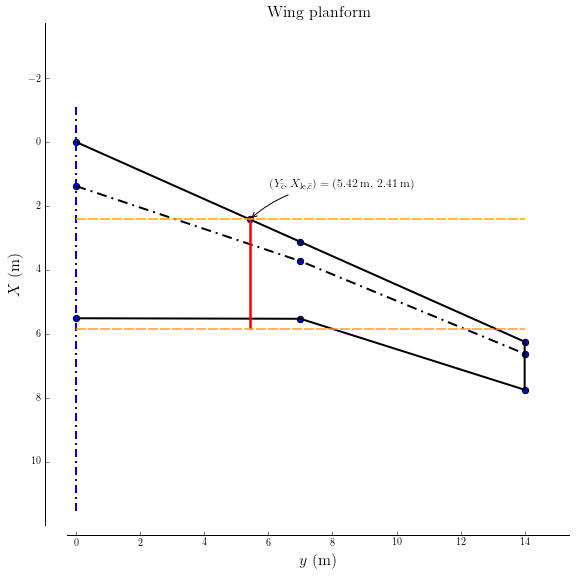

In [27]:
# plot_planform(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2)
plot_planform(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, 
              mac=c_mac, X_le_mac=X_le_mac, Y_mac=Y_mac)

These are the plots of varius functions of spanwise variable $y$.

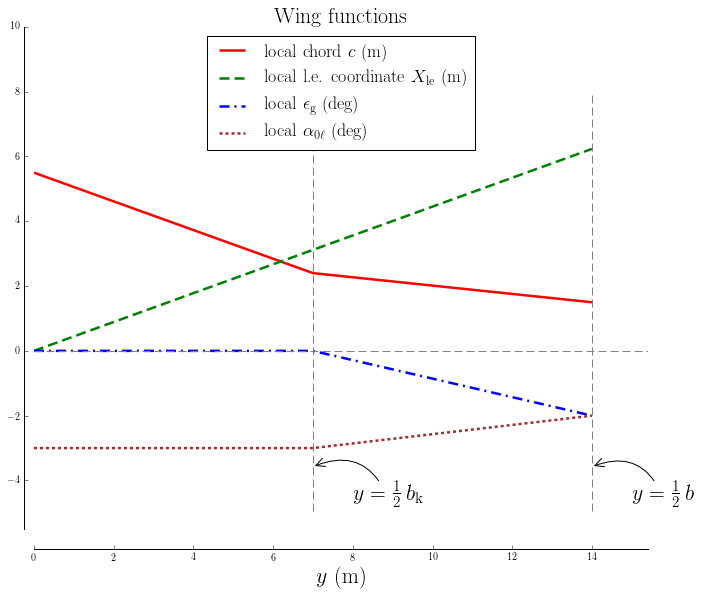

In [28]:
plot_wing_functions(c_r, c_k, c_t, 
                    eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2, 
                    ymax = 10, ymin = -5.5,
                    figsize = (11,9), vshift_xaxis=20,
                    f_chord = f_chord, 
                    f_Xle = f_Xle,
                    f_twist = f_twist,
                    f_alpha0l = f_alpha0l)

# The equivalent wing

An *equivalent wing* is a planform having 
<ul>
<li>the same span $b$ of the original wing,</li>
<li>the same tip chord $c_{\mathrm{t}}$ located at the same longitudinal location of the original wing,</li>
<li>and the same area $S$.</li>
</ul>

According to the following figure, the equivalent wing will have, in general, a different apex point 
$A_1 =\big(X_{\mathrm{le,r,eq}},0\big)$ with respect to the original apex $A$, a root chord $c_{\mathrm{r,eq}}$ which is not equal to the original root chord $c_{\mathrm{r}}$, and a straight leading edge of sweep angle
$\Lambda_{\mathrm{le,eq}}$.

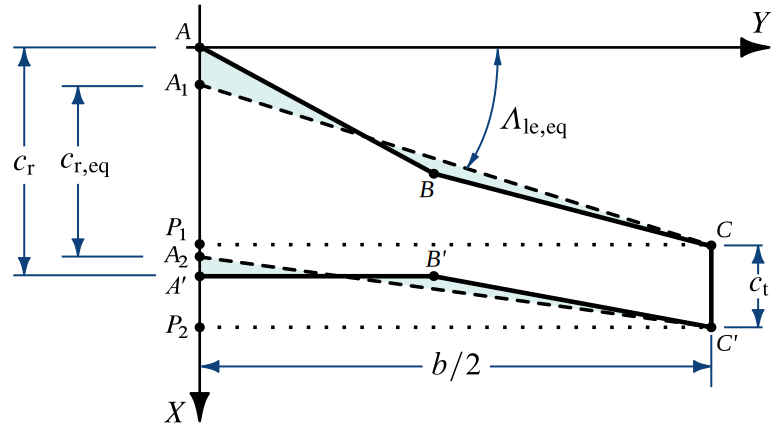

In [29]:
SVG(filename='./resources/equivalent_wing_WEB.svg')

The simple shape of the equivalent wing is fund by determining the points $A_1$ and $A_2$. 

For instance, the point $A_1$ has to be located on the $x$-axis in such a way that the area of the triangle $A_1 C P_1$ is equal to the area of the polygon $ABCP_1$. Similarly, the area of the triangle $A_2 C' P_2$ has to be equal to the area of the polygon $A'B'C'P_2$.

These two conditions give two undependent linear algebraic equations in the unknowns: 
<ul>
<li>$X_{A_1} = X_{\mathrm{le,r,eq}}$</li>
<li>$X_{A_2} = X_{\mathrm{le,r,eq}} + c_{\mathrm{r,eq}}$</li>
</ul>
When the $X_{\mathrm{le,r,eq}}$ and $c_{\mathrm{r,eq}}$ are known, knowing the location of the tip chord, also the leading edge sweep angle $\Lambda_{\mathrm{le,eq}}$ of the equivalent wing will be known.


We can find points $A_1$ and $A_2$ with the aid of SymPy symbolic library.

In [30]:
# symbolic variable
x = sympy.Symbol('x')
# Equal areas
xB = (b_k/2)*math.tan(Lambda_le_1)
# print(xB)
xC = xB + (b/2 - b_k/2)*math.tan(Lambda_le_2)
# print(xC)
xA1 = sympy.solve(xB*(b_k/2)/2 + (xC - xB)*(b_k/2) + (b/2 - b_k/2)*(xC - xB)/2 # A-B-C-P1
                  - (xC - x)*(b/2)/2, # A1-CP-1
                  x)
print('x_A1 = {0:.4} m'.format(xA1[0]))
xAp = c_r
xBp = xB + c_k
xCp = xC + c_t
xA2 = sympy.solve(
    (xAp - xBp)*(b_k/2)/2 
    + (xCp - xBp)*(b_k/2) + (b/2 - b_k/2)*(xCp - xBp)/2 # A'-B'-C'-P2
    - (xCp - x)*(b/2)/2, # A2-C'-P2
    x)
print('x_A2 = {0:.4} m'.format(xA2[0]))
X_le_r_eq = xA1[0]
print('X_le_r_eq = {0:.4} m'.format(X_le_r_eq))
c_r_eq = xA2[0] - xA1[0]
print('c_r_eq = {0:.4} m'.format(c_r_eq))
Lambda_le_eq = math.atan((xC - X_le_r_eq)/(b/2))
print('Lambda_le_eq = {0:.4} deg'.format(Lambda_le_eq*180/math.pi))


x_A1 = 0.0 m
x_A2 = 4.417 m
X_le_r_eq = 0.0 m
c_r_eq = 4.417 m
Lambda_le_eq = 24.0 deg


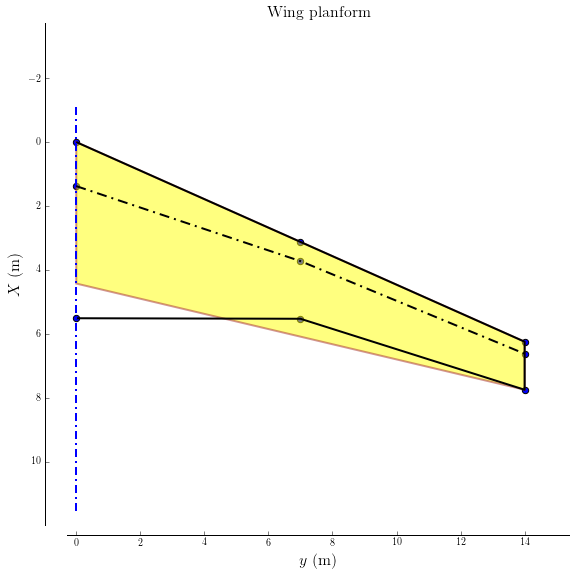

In [31]:
plot_planform(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, 
              X_le_r_eq=X_le_r_eq, c_r_eq=c_r_eq) # mac=c_mac, X_le_mac=X_le_mac, Y_mac=Y_mac